<font size="5">**Police Officer Attdence Prediction**</font>



Author: Kai Chen

Date: April, 2020



<font size="4">**Introduction**</font>

This notebook contains my solution of analyzing the road accident safety data found at https://data.gov.uk/dataset/road-accidents-safety- .

- This analysis includes a model that predicts if a police officer is likely to attend an accident or not.

- The analysis focuses initially only on the accidents from the 2017 dataset.

- The notebook summarizes my initial findings. 

- This is not an exercise that develops a final solution – more of first iteration.

- The notebook describes how I might design and implement for a long term approach a data infrastructure for processing all additional data (large amount including all available years) given the desired use case above. 


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Getting-the-data" data-toc-modified-id="Getting-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Getting the data</a></span></li><li><span><a href="#Preprocessing-the-data" data-toc-modified-id="Preprocessing-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing the data</a></span><ul class="toc-item"><li><span><a href="#Converting-column-'Date'-into-the-python-date-time-format" data-toc-modified-id="Converting-column-'Date'-into-the-python-date-time-format-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Converting column 'Date' into the python date time format</a></span></li><li><span><a href="#Handling-missing-values" data-toc-modified-id="Handling-missing-values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Handling missing values</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)</a></span><ul class="toc-item"><li><span><a href="#Plot-number-of-accidents-per-month" data-toc-modified-id="Plot-number-of-accidents-per-month-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plot number of accidents per month</a></span></li><li><span><a href="#Show-number-of-accidents-in-each-week-day" data-toc-modified-id="Show-number-of-accidents-in-each-week-day-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Show number of accidents in each week day</a></span><ul class="toc-item"><li><span><a href="#Plot-number-of-accidents-in-the-weekdays-of-each-month" data-toc-modified-id="Plot-number-of-accidents-in-the-weekdays-of-each-month-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Plot number of accidents in the weekdays of each month</a></span></li></ul></li><li><span><a href="#How-weather-affects-the-number-of-accidents?" data-toc-modified-id="How-weather-affects-the-number-of-accidents?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>How weather affects the number of accidents?</a></span></li><li><span><a href="#Percentage-of-each-category-of-accident-severity" data-toc-modified-id="Percentage-of-each-category-of-accident-severity-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Percentage of each category of accident severity</a></span><ul class="toc-item"><li><span><a href="#Number-of-fatalities-over-the-months?" data-toc-modified-id="Number-of-fatalities-over-the-months?-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Number of fatalities over the months?</a></span></li></ul></li><li><span><a href="#Number-of-accidents-throughout-the-day" data-toc-modified-id="Number-of-accidents-throughout-the-day-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Number of accidents throughout the day</a></span><ul class="toc-item"><li><span><a href="#Number-of-accidents-through-the-time" data-toc-modified-id="Number-of-accidents-through-the-time-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Number of accidents through the time</a></span></li></ul></li><li><span><a href="#Statistics-of-Vehicles" data-toc-modified-id="Statistics-of-Vehicles-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Statistics of Vehicles</a></span><ul class="toc-item"><li><span><a href="#Sex-and-Age-Band" data-toc-modified-id="Sex-and-Age-Band-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Sex and Age Band</a></span></li><li><span><a href="#Manoeuvre" data-toc-modified-id="Manoeuvre-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>Manoeuvre</a></span></li></ul></li></ul></li><li><span><a href="#Predicting-Police-Officer-Attendance" data-toc-modified-id="Predicting-Police-Officer-Attendance-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Predicting Police Officer Attendance</a></span></li></ul></div>

In [56]:
import pandas as pd
import numpy as np

import glob

import matplotlib.pyplot as plt
import seaborn as sns

import shap


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import lightgbm as lgbm

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")


# Getting the data

In [57]:
data_folder = 'data'
file_cas = '../{}/Cas.csv'.format(data_folder)
file_acc = '../{}/Acc.csv'.format(data_folder)
file_veh = '../{}/Veh.csv'.format(data_folder)


In [58]:
df_acc = pd.read_csv(file_acc)
df_cas = pd.read_csv(file_cas)
df_veh = pd.read_csv(file_veh)


In [59]:
df_acc.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2017010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,05/08/2017,...,0,0,4,1,1,0,0,1,1,E01001450
1,2017010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,1,01/01/2017,...,0,0,4,1,2,0,0,1,1,E01004702
2,2017010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,1,01/01/2017,...,0,0,4,1,1,0,0,1,1,E01004298
3,2017010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,1,01/01/2017,...,0,4,4,2,2,0,0,1,1,E01001429
4,2017010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,1,01/01/2017,...,0,5,4,1,2,0,0,1,1,E01001808


In [60]:
df_acc.shape

(129982, 32)

In [61]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129982 entries, 0 to 129981
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               129982 non-null  object 
 1   Location_Easting_OSGR                        129963 non-null  float64
 2   Location_Northing_OSGR                       129963 non-null  float64
 3   Longitude                                    129953 non-null  float64
 4   Latitude                                     129953 non-null  float64
 5   Police_Force                                 129982 non-null  int64  
 6   Accident_Severity                            129982 non-null  int64  
 7   Number_of_Vehicles                           129982 non-null  int64  
 8   Number_of_Casualties                         129982 non-null  int64  
 9   Date                                         129982 non-nul

In [62]:
df_cas.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2017010001708,1,1,2,2,18,4,3,0,0,1,0,0,9,1,2
1,2017010001708,2,2,1,1,19,4,2,0,0,0,0,0,2,-1,-1
2,2017010001708,2,3,2,1,18,4,1,0,0,0,0,0,2,-1,-1
3,2017010009342,1,1,2,2,33,6,3,0,0,1,0,0,9,1,5
4,2017010009344,3,1,1,2,31,6,3,0,0,0,0,0,9,1,5


In [63]:
df_cas.shape

(170993, 16)

In [64]:
df_cas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170993 entries, 0 to 170992
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      170993 non-null  object
 1   Vehicle_Reference                   170993 non-null  int64 
 2   Casualty_Reference                  170993 non-null  int64 
 3   Casualty_Class                      170993 non-null  int64 
 4   Sex_of_Casualty                     170993 non-null  int64 
 5   Age_of_Casualty                     170993 non-null  int64 
 6   Age_Band_of_Casualty                170993 non-null  int64 
 7   Casualty_Severity                   170993 non-null  int64 
 8   Pedestrian_Location                 170993 non-null  int64 
 9   Pedestrian_Movement                 170993 non-null  int64 
 10  Car_Passenger                       170993 non-null  int64 
 11  Bus_or_Coach_Passenger              170

In [65]:
df_veh.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2017010001708,1,9,0,18,0,0,0,0,0,...,6,1,24,5,1997,2,1,-1,-1,-1
1,2017010001708,2,2,0,18,0,0,1,0,0,...,6,1,19,4,-1,-1,-1,-1,-1,-1
2,2017010009342,1,9,0,18,0,1,0,0,0,...,6,1,33,6,1797,8,8,9,1,9
3,2017010009342,2,9,0,18,0,1,1,0,0,...,6,1,40,7,2204,2,12,2,1,2
4,2017010009344,1,9,0,18,0,1,0,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1


In [66]:
df_veh.shape

(238926, 23)

In [67]:
df_veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238926 entries, 0 to 238925
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Accident_Index                    238926 non-null  object
 1   Vehicle_Reference                 238926 non-null  int64 
 2   Vehicle_Type                      238926 non-null  int64 
 3   Towing_and_Articulation           238926 non-null  int64 
 4   Vehicle_Manoeuvre                 238926 non-null  int64 
 5   Vehicle_Location-Restricted_Lane  238926 non-null  int64 
 6   Junction_Location                 238926 non-null  int64 
 7   Skidding_and_Overturning          238926 non-null  int64 
 8   Hit_Object_in_Carriageway         238926 non-null  int64 
 9   Vehicle_Leaving_Carriageway       238926 non-null  int64 
 10  Hit_Object_off_Carriageway        238926 non-null  int64 
 11  1st_Point_of_Impact               238926 non-null  int64 
 12  Wa

# Preprocessing the data


## Converting column 'Date' into the python date time format


In [68]:
df_acc['Date'] = pd.to_datetime(df_acc['Date'], format="%d/%m/%Y")


In [69]:
df_acc['Date'].describe()

count                  129982
unique                    365
top       2017-12-01 00:00:00
freq                      559
first     2017-01-01 00:00:00
last      2017-12-31 00:00:00
Name: Date, dtype: object

In [70]:
df_acc[['Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129982 entries, 0 to 129981
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    129982 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1015.6 KB


In [71]:
df_acc['Hour'] = df_acc['Time'].str[0:2]
df_acc['Hour'] = pd.to_numeric(df_acc['Hour'])
df_acc = df_acc.dropna(subset=['Hour'])
df_acc['Hour'] = df_acc['Hour'].astype('int')


- Morning Rush from 6am to 9am
- Office Hours from 9am to 4pm 
- Afternoon Rush from 4pm to 7pm 
- Evening from 7pm to 11pm 
- Night from 11pm to 6am 

**Reference**

https://www.bbc.com/news/uk-england-42917201


In [72]:

def get_time_group(hour):
    """
    This function turns the hours into daytime categories
    """
    if hour >= 6 and hour <= 9:
        return "morning rush (6-9)"
    elif hour > 9 and hour <= 16:
        return "office hours (9-16)"
    elif hour > 16 and hour <= 19:
        return "afternoon rush (16-19)"
    elif hour > 19 and hour <= 23:
        return "evening (19-23)"
    else:
        return "night (23-6)"
    
    

In [73]:
df_acc['TimeGroup'] = df_acc['Hour'].apply(get_time_group)

df_acc[['Time', 'Hour', 'TimeGroup']].head()


,Time,Hour,TimeGroup
0,03:12,3,night (23-6)
1,01:30,1,night (23-6)
2,00:30,0,night (23-6)
3,01:11,1,night (23-6)
4,01:42,1,night (23-6)


## Handling missing values

In [74]:
print('Percentage of Missing Values in Accidents:')
print(round(df_acc.isna().sum().sum()/len(df_acc), 3))


Percentage of Missing Values in Accidents:
0.056


In [75]:
print('Percentage of Missing Values (per column) in Accidents:')
print(round(df_acc.isna().sum()/len(df_acc), 3))


Percentage of Missing Values (per column) in Accidents:
Accident_Index                                 0.000
Location_Easting_OSGR                          0.000
Location_Northing_OSGR                         0.000
Longitude                                      0.000
Latitude                                       0.000
Police_Force                                   0.000
Accident_Severity                              0.000
Number_of_Vehicles                             0.000
Number_of_Casualties                           0.000
Date                                           0.000
Day_of_Week                                    0.000
Time                                           0.000
Local_Authority_(District)                     0.000
Local_Authority_(Highway)                      0.000
1st_Road_Class                                 0.000
1st_Road_Number                                0.000
Road_Type                                      0.000
Speed_limit                                

In [76]:
print('Percentage of Missing Values in Vehicles:')
print(round(df_veh.isna().sum().sum()/len(df_veh), 3))


Percentage of Missing Values in Vehicles:
0.0


In [77]:
print('Percentage of Missing Values in Casualties:')
print(round(df_cas.isna().sum().sum()/len(df_cas), 3))


Percentage of Missing Values in Casualties:
0.0


# Exploratory Data Analysis (EDA)


## Plot number of accidents per month

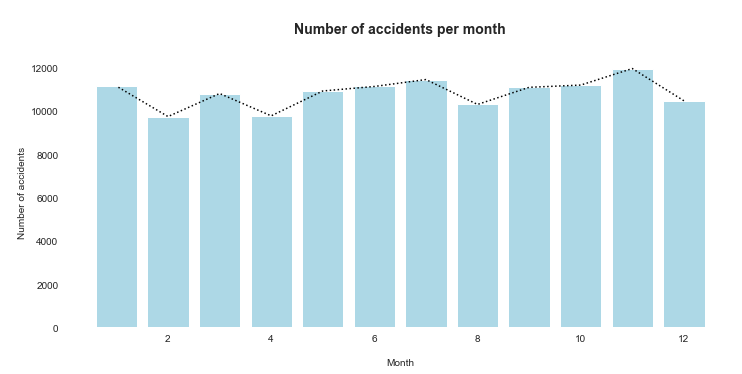

In [78]:
acc_monthly_count = df_acc['Date'].dt.month.value_counts().sort_index(ascending=False)

sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,5))

ax.bar(acc_monthly_count.index, acc_monthly_count.values, color='lightblue')
ax.plot(acc_monthly_count, linestyle=':', color='black')
ax.set_title('\nNumber of accidents per month\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nNumber of accidents')
ax.set(xlabel='\nMonth')

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);


## Show number of accidents in each week day


In [79]:
acc_weekday_counts = pd.DataFrame(df_acc.set_index('Date').resample('1d')['Accident_Index'].size().reset_index())

acc_weekday_counts.columns = ['Date', 'Count']

weekday = acc_weekday_counts['Date'].dt.day_name()
#weekday

acc_weekday_mean = pd.DataFrame(acc_weekday_counts.groupby(weekday)['Count'].mean().reset_index())
acc_weekday_mean.columns = ['Weekday', 'Mean_Accidents']
acc_weekday_mean.set_index('Weekday', inplace=True)
acc_weekday_mean


,Mean_Accidents
Weekday,
Friday,408.557692
Monday,344.923077
Saturday,331.269231
Sunday,282.547170
Thursday,380.711538
Tuesday,374.653846
Wednesday,371.500000


In [80]:
acc_weekday_mean[acc_weekday_mean['Mean_Accidents'] == acc_weekday_mean['Mean_Accidents'].max()].index


Index(['Friday'], dtype='object', name='Weekday')

In [81]:
acc_weekday_sum = pd.DataFrame(acc_weekday_counts.groupby(weekday)['Count'].sum().reset_index())
acc_weekday_sum.columns = ['Weekday', 'Sum_Accidents']
acc_weekday_sum.set_index('Weekday', inplace=True)
acc_weekday_sum


,Sum_Accidents
Weekday,
Friday,21245
Monday,17936
Saturday,17226
Sunday,14975
Thursday,19797
Tuesday,19482
Wednesday,19318


In [82]:
acc_weekday_sum[acc_weekday_sum['Sum_Accidents'] == acc_weekday_sum['Sum_Accidents'].max()].index


Index(['Friday'], dtype='object', name='Weekday')

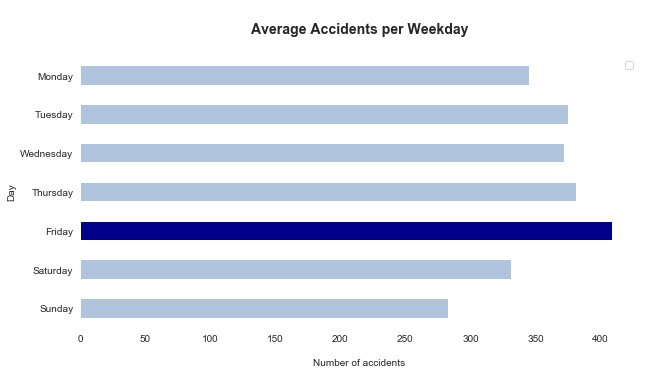

In [83]:

days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']

max_acc_day = acc_weekday_mean[acc_weekday_mean['Mean_Accidents'] == acc_weekday_mean['Mean_Accidents'].max()].index.values[0]
colors = []
for day in days:
    if day == max_acc_day:
        colors.append('darkblue')
    else:
        colors.append('lightsteelblue')
        
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))

acc_weekday_mean.reindex(days).plot(kind='barh', ax=ax, color=[colors])
ax.set_title('\nAverage Accidents per Weekday\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nNumber of accidents', ylabel='Day')
ax.legend('')

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);


### Plot number of accidents in the weekdays of each month


In [84]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    #remove % and cast to float
    data = data.replace('%','', regex=True).astype(float)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)


In [85]:
weekday = df_acc['Date'].dt.day_name()
month = df_acc['Date'].dt.month

acc_group = df_acc.groupby([month, weekday]).size()

acc_group = acc_group.rename_axis(['Month', 'Weekday']).unstack('Weekday').reindex(columns=days)
acc_group.style.apply(highlight_max)
#acc_group


Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday
Month,,,,,,,
1,1295,1298,1665,1663,1513,1905,1808
2,942,1208,1654,1478,1419,1557,1482
3,1056,1337,1943,1826,1821,1445,1377
4,1536,1685,1302,1362,1332,1380,1176
5,1183,1295,1671,1536,1887,1794,1556
6,1201,1397,1956,1932,1566,1568,1510
7,1581,1792,1642,1505,1540,1577,1812
8,1263,1230,1452,1710,1768,1682,1195
9,1184,1740,2232,1502,1483,1530,1420


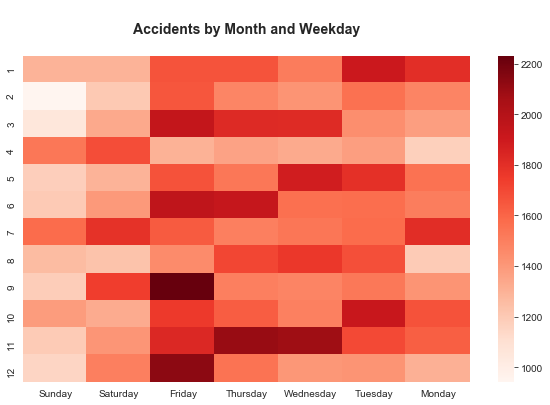

In [86]:
plt.figure(figsize=(10,6))
sns.heatmap(acc_group, cmap='Reds')
plt.title('\nAccidents by Month and Weekday\n', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('');


## How weather affects the number of accidents?


Weather label

- 1	Fine no high winds
- 2	Raining no high winds
- 3	Snowing no high winds
- 4	Fine + high winds
- 5	Raining + high winds
- 6	Snowing + high winds
- 7	Fog or mist
- 8	Other
- 9	Unknown
- -1	Data missing or out of range!


In [87]:
df_acc[['Weather_Conditions']].describe()

,Weather_Conditions
count,129979.000000
mean,1.641488
std,1.843737
min,-1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,9.000000


In [88]:
df_acc.Weather_Conditions.value_counts(normalize=True)


 1    0.805576
 2    0.110018
 9    0.035306
 8    0.020573
 4    0.009548
 5    0.008478
 3    0.004932
 7    0.004801
 6    0.000762
-1    0.000008
Name: Weather_Conditions, dtype: float64

## Percentage of each category of accident severity

accident severity

- 1	Fatal
- 2	Serious
- 3	Slight



In [89]:
df_acc['Accident_Severity'].value_counts()


3    105769
2     22534
1      1676
Name: Accident_Severity, dtype: int64

In [90]:
df_acc[['Accident_Severity']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129979 entries, 0 to 129981
Data columns (total 1 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Accident_Severity  129979 non-null  int64
dtypes: int64(1)
memory usage: 2.0 MB


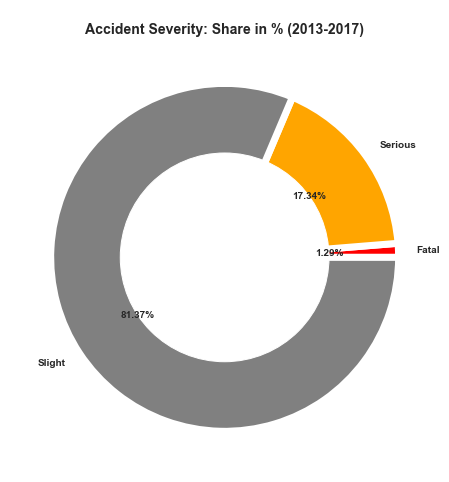

In [91]:

fatal   = df_acc.Accident_Severity.value_counts()[1]
serious = df_acc.Accident_Severity.value_counts()[2]
slight  = df_acc.Accident_Severity.value_counts()[3]

names = ['Fatal','Serious', 'Slight']
size  = [fatal, serious, slight]
#explode = (0.2, 0, 0)

plt.pie(x=size, labels=names, colors=['red', 'orange', 'gray'], 
        autopct='%1.2f%%', pctdistance=0.6, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nAccident Severity: Share in % (2013-2017)', fontsize=14, fontweight='bold')
plt.show()


### Number of fatalities over the months?


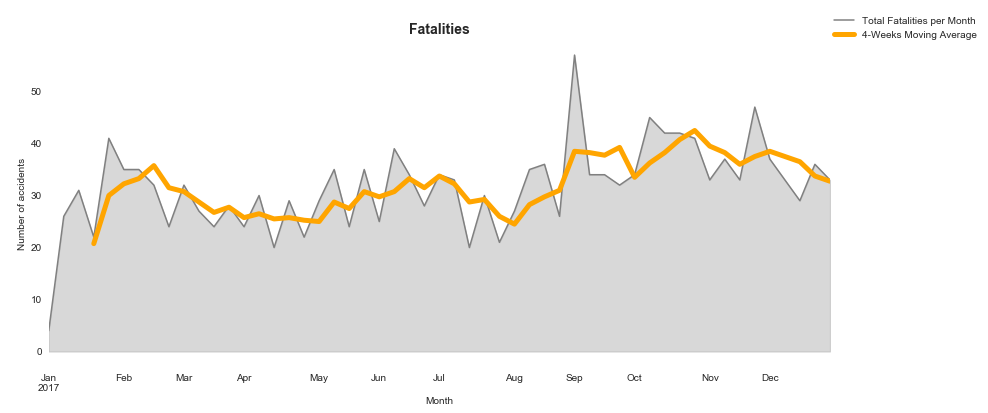

In [92]:

mask = df_acc['Accident_Severity']==1
df_weekly_fatalities = df_acc.loc[mask].set_index('Date').sort_index().resample('W').size()

sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,6))

df_weekly_fatalities.plot(label='Total Fatalities per Month', color='gray', ax=ax)
plt.fill_between(x=df_weekly_fatalities.index, y1=df_weekly_fatalities.values, color='grey', alpha=0.3)
df_weekly_fatalities.rolling(window=4).mean().plot(color='orange', linewidth=5, label='4-Weeks Moving Average', ax=ax)

ax.set_title('\nFatalities', fontsize=14, fontweight='bold')
ax.set(ylabel='\nNumber of accidents', xlabel='Month')
ax.legend(bbox_to_anchor=(1.2, 1.1), frameon=False)

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);


## Number of accidents throughout the day

### Number of accidents through the time

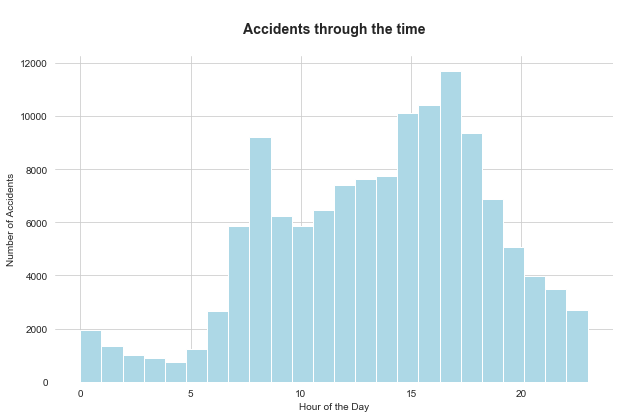

In [93]:

sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))


df_acc.Hour.hist(bins=24, ax=ax, color='lightblue')
ax.set_title('\nAccidents through the time\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour of the Day', ylabel='Number of Accidents')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);


In [94]:
df_acc_counts = df_acc.groupby(['TimeGroup', 'Accident_Severity']).size()

df_acc_counts = df_acc_counts.rename_axis(['TimeGroup', 'Accident_Severity']).unstack('Accident_Severity').rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
df_acc_counts.style.apply(highlight_max)


Accident_Severity,fatal,serious,slight
TimeGroup,,,
afternoon rush (16-19),295,4924,22717
evening (19-23),261,2914,12060
morning rush (6-9),222,3702,20047
night (23-6),229,1616,5339
office hours (9-16),669,9378,45606


In [95]:
df_acc_counts['sum'] = df_acc_counts.sum(axis=1)
df_acc_counts = df_acc_counts.join(df_acc_counts.div(df_acc_counts['sum'], axis=0), rsuffix=' in %')

df_acc_counts_share = df_acc_counts.drop(columns=['fatal', 'serious', 'slight', 'sum', 'sum in %'], axis=1)
df_acc_counts_share.style.apply(highlight_max)


Accident_Severity,fatal in %,serious in %,slight in %
TimeGroup,,,
afternoon rush (16-19),0.010560,0.176260,0.813180
evening (19-23),0.017132,0.191270,0.791598
morning rush (6-9),0.009261,0.154437,0.836302
night (23-6),0.031876,0.224944,0.743179
office hours (9-16),0.012021,0.168508,0.819471


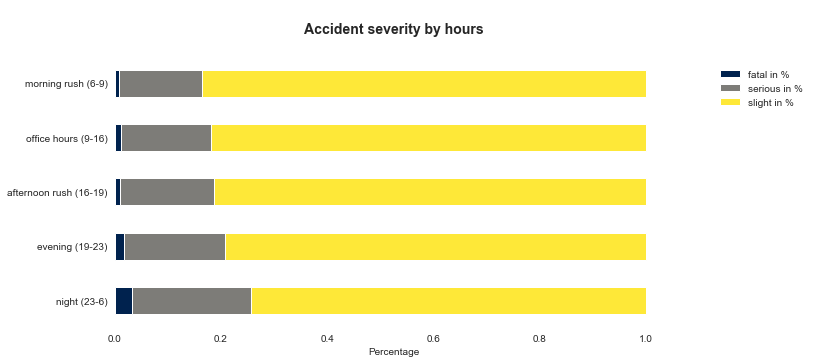

In [96]:

fig, ax = plt.subplots(figsize=(10, 5))

order = ['night (23-6)', 'evening (19-23)', 'afternoon rush (16-19)', 'office hours (9-16)', 'morning rush (6-9)']
df_acc_counts_share.reindex(order).plot(kind='barh', ax=ax, stacked=True, cmap='cividis')
ax.set_title('\nAccident severity by hours\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Percentage', ylabel='')
ax.legend(bbox_to_anchor=(1.25, 0.98), frameon=False)


sns.despine(top=True, right=True, left=True, bottom=True);


## Statistics of Vehicles





### Sex and Age Band

Sex of driver
- 1	Male
- 2	Female
- 3	Not known
- -1	Data missing or out of range


Age band
- 1	0 - 5
- 2	6 - 10
- 3	11 - 15
- 4	16 - 20
- 5	21 - 25
- 6	26 - 35
- 7	36 - 45
- 8	46 - 55
- 9	56 - 65
- 10	66 - 75
- 11	Over 75
- -1	Data missing or out of range

In [97]:
def get_sex(row):
    if row['Sex_of_Driver'] == 1:
        val = 'Male'
    elif row['Sex_of_Driver'] == 2:
        val = 'Female'
    elif row['Sex_of_Driver'] == 3:
        val = 'Unknown'
    else:
        val = 'Data Missing'
    return val


def get_age_brand(row):
    age = row['Age_Band_of_Driver']
    if age == 1:
        val = '0-5'
    elif age == 2:
        val = '6-10'
    elif age == 3:
        val = '11-15'
    elif age == 4:
        val = '16-20'
    elif age == 5:
        val = '21-25'
    elif age == 6:
        val = '26-35'
    elif age == 7:
        val = '36-45'
    elif age == 8:
        val = '46-55'
    elif age == 9:
        val = '56-65'
    elif age == 10:
        val = '66-75'
    elif age == 11:
        val = 'Over 75'
    else:
        val = 'Data Missing'
    
    return val


In [98]:
df_veh['Sex_of_Driver_str'] = df_veh.apply(get_sex, axis=1)


In [99]:
df_veh.Sex_of_Driver_str.value_counts(normalize=True)


Male            0.644400
Female          0.272582
Unknown         0.083005
Data Missing    0.000013
Name: Sex_of_Driver_str, dtype: float64

In [100]:
df_veh['Age_Band_of_Driver_str'] = df_veh.apply(get_age_brand, axis=1)


In [101]:
df_veh.Age_Band_of_Driver_str.value_counts(normalize=True)


26-35           0.214083
36-45           0.168450
46-55           0.155341
Data Missing    0.116245
21-25           0.105146
56-65           0.089275
16-20           0.068754
66-75           0.044943
Over 75         0.027958
11-15           0.007860
6-10            0.001762
0-5             0.000184
Name: Age_Band_of_Driver_str, dtype: float64

In [102]:

df_drivers = df_veh.groupby(['Age_Band_of_Driver_str', 'Sex_of_Driver_str']).size().reset_index()


df_drivers.drop(df_drivers[(df_drivers['Age_Band_of_Driver_str'] == 'Data Missing') | 
                           (df_drivers['Sex_of_Driver_str'] == 'Data Missing') | 
                           (df_drivers['Sex_of_Driver_str'] == 'Unknown')].index, axis=0, inplace=True)

df_drivers.columns = ['Age_Band_of_Driver_str', 'Sex_of_Driver_str', 'Count']
df_drivers


,Age_Band_of_Driver_str,Sex_of_Driver_str,Count
0,0-5,Female,6
1,0-5,Male,38
2,11-15,Female,196
3,11-15,Male,1678
5,16-20,Female,4393
6,16-20,Male,11858
8,21-25,Female,7847
9,21-25,Male,17141
11,26-35,Female,15425
12,26-35,Male,34951


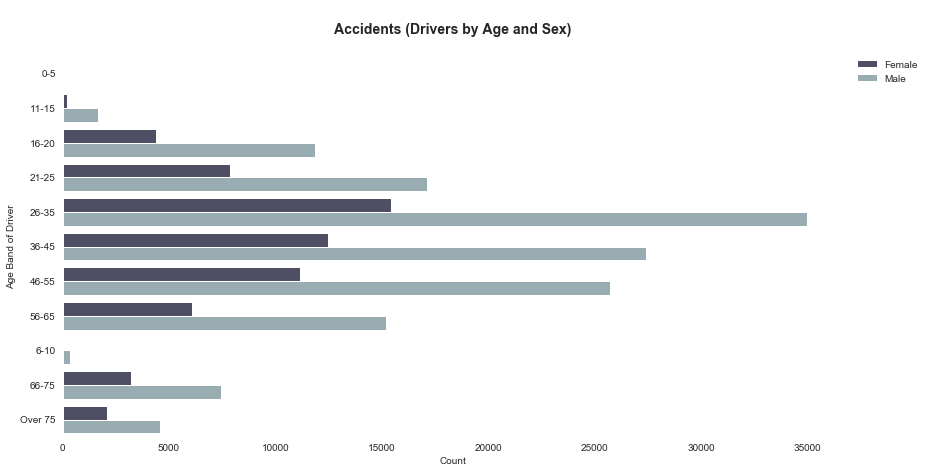

In [103]:

fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(y='Age_Band_of_Driver_str', x='Count', hue='Sex_of_Driver_str', data=df_drivers, palette='bone')
ax.set_title('\nAccidents (Drivers by Age and Sex)\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Count', ylabel='Age Band of Driver')
ax.legend(bbox_to_anchor=(1.1, 1.), borderaxespad=0., frameon=False)


sns.despine(top=True, right=True, left=True, bottom=True);


In [104]:
df_veh.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type',
       'Vehicle_IMD_Decile', 'Sex_of_Driver_str', 'Age_Band_of_Driver_str'],
      dtype='object')

### Manoeuvre



- 1	Reversing
- 2	Parked
- 3	Waiting to go - held up
- 4	Slowing or stopping
- 5	Moving off
- 6	U-turn
- 7	Turning left
- 8	Waiting to turn left
- 9	Turning right
- 10	Waiting to turn right
- 11	Changing lane to left
- 12	Changing lane to right
- 13	Overtaking moving vehicle - offside
- 14	Overtaking static vehicle - offside
- 15	Overtaking - nearside
- 16	Going ahead left-hand bend
- 17	Going ahead right-hand bend
- 18	Going ahead other
- -1	Data missing or out of range


In [105]:
def get_manoeuvre(row):
    age = row['Vehicle_Manoeuvre']
    if age == 1:
        val = 'Reversing'
    elif age == 2:
        val = 'Parked'
    elif age == 3:
        val = 'Waiting to go - held up'
    elif age == 4:
        val = 'Slowing or stopping'
    elif age == 5:
        val = 'Moving off'
    elif age == 6:
        val = 'U-turn'
    elif age == 7:
        val = 'Turning left'
    elif age == 8:
        val = 'Waiting to turn left'
    elif age == 9:
        val = 'Turning right'
    elif age == 10:
        val = 'Waiting to turn right'
    elif age == 11:
        val = 'Changing lane to left'
    elif age == 12:
        val = 'Changing lane to right'
    elif age == 13:
        val = 'Overtaking moving vehicle - offside'
    elif age == 14:
        val = 'Overtaking static vehicle - offside'
    elif age == 15:
        val = 'Overtaking - nearside'
    elif age == 16:
        val = 'Going ahead left-hand bend'
    elif age == 17:
        val = 'Going ahead right-hand bend'
    elif age == 18:
        val = 'Going ahead other'
    else:
        val = 'Data Missing'
    
    return val


In [106]:
df_veh['Vehicle_Manoeuvre_str'] = df_veh.apply(get_manoeuvre, axis=1)


In [107]:
# prepare dataframe
df_veh_manoeuvre = df_veh.groupby('Vehicle_Manoeuvre_str').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
                                                        
#df_veh_manoeuvre = df_veh_manoeuvre[df_veh_manoeuvre.counts > 80000]
df_veh_manoeuvre


,Vehicle_Manoeuvre_str,counts
4,Going ahead other,114183
14,Turning right,22259
12,Slowing or stopping,17133
16,Waiting to go - held up,14214
6,Moving off,11688
10,Parked,9881
5,Going ahead right-hand bend,7964
13,Turning left,7866
3,Going ahead left-hand bend,6939
8,Overtaking moving vehicle - offside,4503


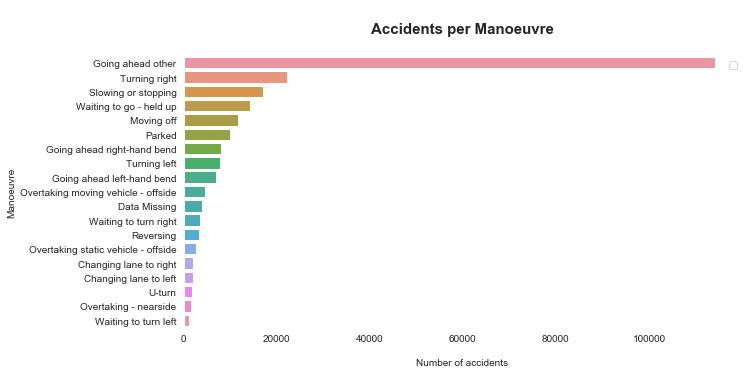

In [108]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))


sns.barplot(x="counts", y="Vehicle_Manoeuvre_str", data=df_veh_manoeuvre)

#df_veh_manoeuvre.plot(kind='barh', ax=ax)
ax.set_title('\nAccidents per Manoeuvre\n', fontsize=15, fontweight='bold')
ax.set(xlabel='\nNumber of accidents', ylabel='Manoeuvre')
ax.legend('')

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);


# Predicting Police Officer Attendance


In [109]:
df_veh_acc = pd.merge(df_acc, df_veh, on='Accident_Index')


In [110]:
df_veh_acc.head()


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Sex_of_Driver_str,Age_Band_of_Driver_str,Vehicle_Manoeuvre_str
0,2017010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,2017-08-05,...,5,1997,2,1,-1,-1,-1,Male,21-25,Going ahead other
1,2017010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,2017-08-05,...,4,-1,-1,-1,-1,-1,-1,Male,16-20,Going ahead other
2,2017010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,1,2017-01-01,...,6,1797,8,8,9,1,9,Male,26-35,Going ahead other
3,2017010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,1,2017-01-01,...,7,2204,2,12,2,1,2,Male,36-45,Going ahead other
4,2017010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,1,2017-01-01,...,-1,-1,-1,-1,-1,-1,-1,Unknown,Data Missing,Going ahead other


In [111]:
df_veh_acc.info()    


<class 'pandas.core.frame.DataFrame'>
Int64Index: 205624 entries, 0 to 205623
Data columns (total 59 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               205624 non-null  object        
 1   Location_Easting_OSGR                        205590 non-null  float64       
 2   Location_Northing_OSGR                       205590 non-null  float64       
 3   Longitude                                    205574 non-null  float64       
 4   Latitude                                     205574 non-null  float64       
 5   Police_Force                                 205624 non-null  int64         
 6   Accident_Severity                            205624 non-null  int64         
 7   Number_of_Vehicles                           205624 non-null  int64         
 8   Number_of_Casualties                         205624 non-null  in

In [112]:
df_veh_acc.isna().sum()


Accident_Index                                     0
Location_Easting_OSGR                             34
Location_Northing_OSGR                            34
Longitude                                         50
Latitude                                          50
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                               0
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                        0
Junction_Detail                               

In [113]:
for col in ['Accident_Severity', 'TimeGroup', 'Speed_limit', 'Urban_or_Rural_Area',
            'Age_Band_of_Driver', 'Sex_of_Driver', 'Vehicle_Manoeuvre']:
    df_veh_acc[col] = df_veh_acc[col].astype('category')
    



In [114]:
# define numerical columns
num_cols = ['Age_of_Vehicle', 'Engine_Capacity_.CC.']


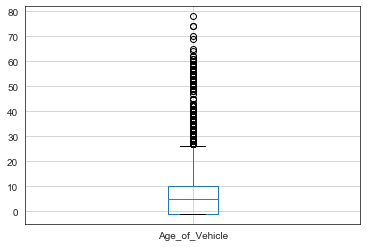

In [115]:
df_veh_acc[['Age_of_Vehicle']].plot.box(grid='True')
    

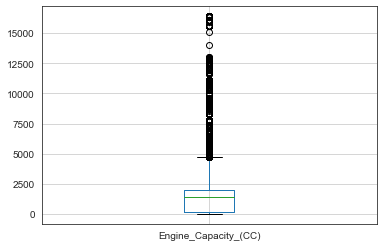

In [116]:

df_veh_acc[['Engine_Capacity_(CC)']].plot.box(grid='True')
   

In [117]:
df_veh_acc['Age_of_Vehicle'].describe()


count    205624.000000
mean          5.715033
std           5.985304
min          -1.000000
25%          -1.000000
50%           5.000000
75%          10.000000
max          78.000000
Name: Age_of_Vehicle, dtype: float64

In [118]:
len(set(df_veh_acc['Age_of_Vehicle'].values))


67

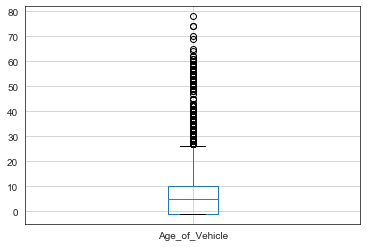

In [119]:
df_veh_acc[['Age_of_Vehicle']].plot.box(grid='True')


In [120]:
age_of_vehicle_bins = {1: '1 to <2 years', 
                       2: '2 to <5 years', 
                       3: '5 to <10 years', 
                       4: '>=10 years'}


In [121]:
# arguments in bins parameter denote left edge of each bin
df_veh_acc['Age_of_Vehicle_bin'] = np.digitize(df_veh_acc['Age_of_Vehicle'], bins=[1,2,5,10])

# convert into categorical column
df_veh_acc['Age_of_Vehicle_bin'] = df_veh_acc['Age_of_Vehicle_bin'].astype('category')

# check the count within each bucket
df_veh_acc['Age_of_Vehicle_bin'].value_counts().sort_index()


0    53005
1    13941
2    34068
3    44346
4    60264
Name: Age_of_Vehicle_bin, dtype: int64

In [122]:
#df_veh_acc['Did_Police_Officer_Attend_Scene_of_Accident'].describe()

#df_veh_acc[['Did_Police_Officer_Attend_Scene_of_Accident']].plot.box(grid='True')

df_veh_acc[['Did_Police_Officer_Attend_Scene_of_Accident']].count()


Did_Police_Officer_Attend_Scene_of_Accident    205624
dtype: int64

In [123]:
set(df_veh_acc['Did_Police_Officer_Attend_Scene_of_Accident'])

{1, 2, 3}

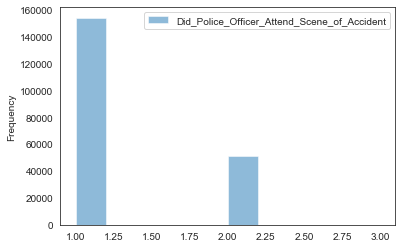

In [124]:
ax = df_veh_acc[['Did_Police_Officer_Attend_Scene_of_Accident']].plot.hist(alpha=0.5)


In [125]:
len(df_veh_acc[df_veh_acc['Did_Police_Officer_Attend_Scene_of_Accident']==1])


154198

In [126]:
len(df_veh_acc[df_veh_acc['Did_Police_Officer_Attend_Scene_of_Accident']==2])


51410

In [127]:
len(df_veh_acc[df_veh_acc['Did_Police_Officer_Attend_Scene_of_Accident']==3])


16

In [128]:
cat_cols = ['TimeGroup', 'Speed_limit', 'Urban_or_Rural_Area',
            'Age_Band_of_Driver', 'Age_of_Vehicle', 'Sex_of_Driver', 'Vehicle_Manoeuvre']

num_cols = ['Age_of_Vehicle', 'Engine_Capacity_(CC)']

target_col = ['Did_Police_Officer_Attend_Scene_of_Accident']

cols = cat_cols + num_cols + target_col


In [129]:
df_model = df_veh_acc[cols].copy()
df_model.shape


(205624, 10)

In [130]:
df_model = df_model[df_model['Did_Police_Officer_Attend_Scene_of_Accident'] != 3]
df_model.shape

(205608, 10)

In [131]:
df_model['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts(normalize=True)


1    0.749961
2    0.250039
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: float64

In [132]:
df_model['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts(normalize=False)


1    154198
2     51410
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

In [133]:

X = df_model.drop(['Did_Police_Officer_Attend_Scene_of_Accident'], axis=1)

Y = df_model[['Did_Police_Officer_Attend_Scene_of_Accident']]


In [134]:
le_time = preprocessing.LabelEncoder()
X['TimeGroup'] = le_time.fit_transform(X['TimeGroup'].values)


In [135]:


# split our data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [136]:

model_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)


              precision    recall  f1-score   support

           1       0.79      0.91      0.85     30792
           2       0.51      0.29      0.37     10330

    accuracy                           0.75     41122
   macro avg       0.65      0.60      0.61     41122
weighted avg       0.72      0.75      0.73     41122



In [137]:
cross_val_score(model_rf, X_train, y_train, scoring='f1_macro', n_jobs=-1)


array([0.61059094, 0.60624272, 0.60784769, 0.61363947, 0.61164203])

In [138]:
model_lgbm = lgbm.LGBMClassifier()
model_lgbm.fit(X_train, y_train)
y_pred = model_lgbm.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           1       0.79      0.97      0.87     30792
           2       0.72      0.24      0.36     10330

    accuracy                           0.79     41122
   macro avg       0.75      0.60      0.62     41122
weighted avg       0.77      0.79      0.74     41122



In [139]:
cross_val_score(model_lgbm, X_train, y_train, scoring='f1_macro', n_jobs=-1)


array([0.61903805, 0.61345414, 0.61368952, 0.62236548, 0.61693305])

In [140]:
set(df_acc['Did_Police_Officer_Attend_Scene_of_Accident'].values)

{1, 2, 3}